# FritzhughNagumo-Model 2D Lyapunov Exponent Calculation

In [1]:
### MODULE IMPORT ###
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

## FritzhughNagumo-Model

In [2]:
### MODEL DEFINITIONS ###
def nagumo(x, t, a, b, e, I):
    #x[0] is u         - membrane voltage
    #x[1] is w         - recovery variable 
    # dx1dt is u_dot  - change of membrane voltage over time
    # dx2dt is w_dot  - change of recovery
    
    #t is time
    #a is a
    #b is b           - threshold value
    #e is epsilon
    #I is I            - external injection current
    
    dx1dt = a*x[0]*(x[0]-b)*(1-x[0])-x[1]+I 
    dx2dt = e*(x[0]-x[1])
        
    return [dx1dt, dx2dt]

In [3]:
### NULLCLINE PLOT DEFINITIONS - FN MODEL ###

def plot_nullclines(a, b, I, e): # ! FritzhughNagumo-Model spefic !
    # u nullcline
    u = np.linspace(-1, 2, 100)
    w = a*u*(u-b)*(1-u)+I
    plt.plot(u, w)
    
    # w nullcline
    w = np.linspace(-1, 1)
    u = w
    plt.plot(u, w)
    
#plot_nullclines (a,b,I,e)    

In [4]:
# Jacobian of FN System
#              dx                   dy    
#Fu direction -a*b-2*a*b*u-a*b*u^2, -1
#Fw direction e                   , -e

def FNJacobian(x,t,a,b,e,I):
    u=x[0]
    w=x[1]
    Juu=-a*b-2*a*b*u+2*a*u-3*a*u*u  #Du in u direction
    Juw=-1  #Du in w direction
    
    Jwu= e #Dw in u direction
    Jww=-e #Dw in w direction
    
    return [[Juu, Juw], [Jwu, Jww]]
#returns one matrix consisting of 2 vectors; derivate in u-direction, derivate in w-direction

In [5]:
# LyaPunovy "Volume" with the Lyapunov Exponents as vectors
# Define Starting Matrix Y0
y0 =  [[1, 0], [0, 1]]

In [6]:
### RENORMALIZATION FUNCTION ###

def renorm(tr0,tr1,td): #renormalization function
    #reads in two points tr0, tr1 and a target distance
    #returns a difference vector unpurtraj to new pertraj
    #also returns the original distance between the two points
    #new point has the same direction as the vector tr0-tr1
    #but distance to tr0 is the target distance
    
    vector = td * (tr0-tr1)/(np.linalg.norm(tr0-tr1)) #length*vector/abs(vector)
    length = np.linalg.norm(tr0-tr1)#how far these parts where appart
    
    return vector, length

In [7]:

 #starting values
a=3#3
b=-0.05#0.2 
I=0#0 
e=0.01#0.01

#starting point coordinates
u0=0.01     #0.01 here the sum is correct #0.5 Here the last lya value is the EW of the Matrix
w0=0  #0 at least for -0.58         #0.2


x0 = [u0 ,w0] #starting point as vector


pertubation = 0.01 #0.01 #length of pertubation at the start and target distance


Tmax=50 #running time of the first plot


h = 0.0001 # Step size of the mathmatical aglorithm 
TimeOverAll = 1000#400 #10000 # with q #100000 without q #is about max #50000 is to much #RunningTime of the Integration


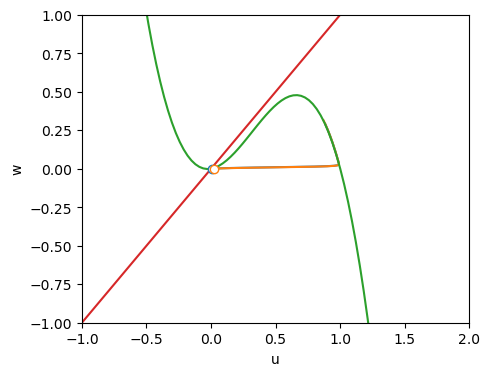

In [8]:
### 2D PLOT INCLUDING NULLCINES ###

%matplotlib inline    
    
nagumo_fig = plt.figure(figsize=(5,4))
    
plt.xlim(-1, 2)  #coordinate system
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')


x0_1 = x0.copy() #creating of perturbed vector as pure copy of starting vector
x0_1[0] = x0[0]+pertubation #adding purtubation in 1st dimension

#Define Running Time in the System
ts = np.linspace(0,Tmax,round(Tmax*10))

#calc 1st trajectory
traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
lh = plt.plot(traj[:,0], traj[:,1])

#calc 2nd trajectory
traj_1 = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0_1, ts)
lh_1 = plt.plot(traj_1[:,0], traj_1[:,1])


plt.figure(nagumo_fig)
plot_nullclines (a,b,I,e) # plot ! FritzhughNagumo-Model spefic ! nullcines of the system with the parameters above 

plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
plt.plot(*x0_1, 'bo', markeredgecolor = lh_1[0].get_color(), markerfacecolor = 'w') #starting point x0


    

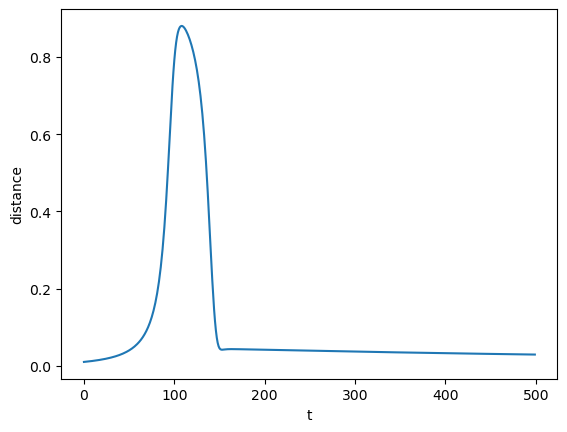

In [9]:
#distance between 2 slightly perturbed trajectoris

u_A = traj[:,0]
w_A = traj[:,1]
u_B = traj_1[:,0]
w_B = traj_1[:,1]
plt.xlabel('t')
plt.ylabel('distance')

plt.plot(((u_A-u_B)**2+(w_A-w_B)**2)**(1/2))

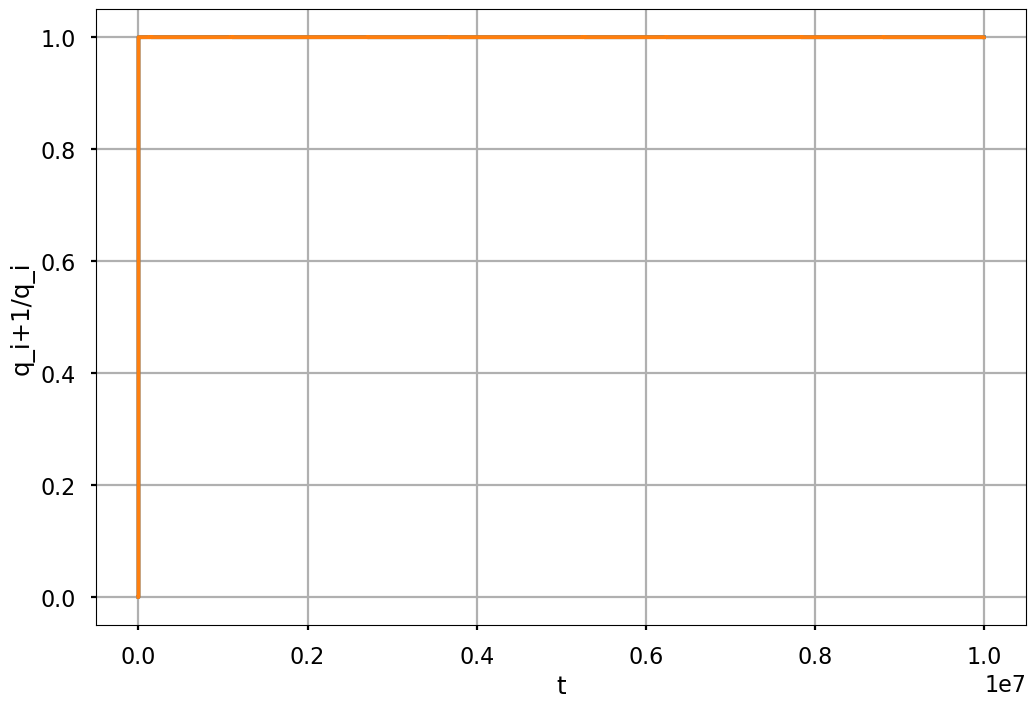

In [10]:
### CALCULATION OF STEPSIZES AND DEVELOPMENT IN TIME ###

plt.style.use('seaborn-poster')


# Define parameters

#function of nagumo via time
f= lambda t,x: np.array(nagumo(x,t,a,b,e,I))
t = np.arange(0, TimeOverAll + h, h) # Numerical grid

#start values of trajectories
s0 = x0 #unpur traj start
s0_1 = x0_1 #once purturbed traj
s0_2 = x0_1 #renorm traj starts atsame point as pur traj
pur = np.linalg.norm(np.asarray(x0_1)-np.asarray(x0)) # starting pertubation distance


# Explicit Euler Method

s = np.zeros((len(t),2)) #traj of unpur state Array 2 columns, t lines
s_1 = np.zeros((len(t),2)) #traj of purstate

q = np.zeros(len(t))  #Euclidean unpur traj to purtraj t0-t1
qstep = np.zeros(len(t)) #Increasement of last step's Euclidean

d = np.zeros(len(t))  #Euclidean unpur - renormalied t0-t2
dstep = np.zeros(len(t)) #Increasement of last step's Euclidean renormalizeversion

pert = np.zeros(len(t)) #distance between t0 and t2 from the function


s_2=np.zeros((len(t),2)) #traj of renormalized purstate

s[0] = s0  #initial conditions in first lines of traj-arrays
s_1[0] = s0_1
s_2[0] = s0_2


for i in range(0, len(t) - 1):
    
    re=renorm(s[i],s_2[i],pur)
    pert[i]=re[1]
    
    #IF PERT BIGGER 0.00001 OR SMALLER XXX 
    s_2[i]=s[i]+re[0]         #add renormaliztion distance to origial traj to receive renormalized purtraj 
    #END IF       
                    
    s[i + 1] = s[i] + h*f(t[i], s[i]) #One Euler Step for the first traj 
    
    #perturbed traj without inferference; only starting point perturbed
    s_1[i + 1] = s_1[i] + h*f(t[i], s_1[i]) #perturbed traj    
    q[i+1] = np.linalg.norm(s[i+1] - s_1[i+1]) #calc distance between unpur traj and purtraj AT THIS STEP
    qstep[i+1] = q[i]/q[i+1] #quotient between q_i+1 and q_i
            
    s_2[i + 1] = s_2[i] + h*f(t[i], s_2[i]) #renorm perturbed traj    
    d[i+1] = np.linalg.norm(s[i+1] - s_2[i+1]) #calc distance to renorm traj AT THIS STEP        
    dstep[i+1] = d[i]/d[i+1] #quotient between q_i+1 and q_i
    
    
    
plt.figure(figsize = (12, 8))

plt.xlabel('t')
plt.ylabel('q_i+1/q_i')
plt.plot(qstep) #draw quotient between q_i+1 and q_i
plt.plot(dstep)
#plt.plot(pert)

#plt.title('PreStep for Lyapunov')
plt.grid()
plt.show()

Y0 [[1, 0], [0, 1]]
Y von 0 [[1. 0.]
 [0. 1.]]
Volumen 1.0
y von [0.000000e+00 1.000000e-04 2.000000e-04 ... 9.999998e+02 9.999999e+02
 1.000000e+03] [[-0.9001867   0.43550419]
 [ 0.43550419  0.9001867 ]]
Volumen -0.9999999999999998
lya 1-2 ist  -1.4341401861940822e-07 -4.869608217687641e-05
Summe 1  0.019728010766773295
Summe 2  -1.2382824984337197


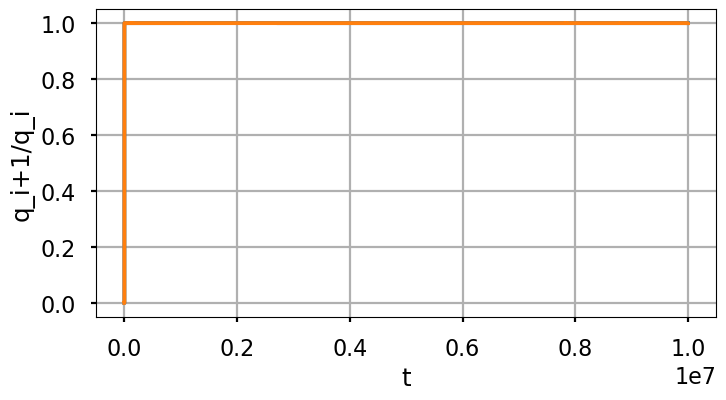

In [11]:
### FN Model ### CALCULATION OF STEPSIZES AND DEVELOPMENT IN TIME  ###

#plt.style.use('seaborn-poster')


# Define parameters

#function of nagumo via time

f= lambda t,x: np.array(nagumo(x,t,a,b,e,I))
t = np.arange(0, TimeOverAll + h, h) # Numerical grid

#start values of trajectories
s0 = x0 #unpur traj start
s0_1 = x0_1 #once purturbed traj
s0_2 = x0_1 #renorm traj starts atsame point as pur traj
pur = np.linalg.norm(np.asarray(x0_1)-np.asarray(x0)) # starting pertubation distance

#########
# Explicit Euler Method

s = np.zeros((len(t),2)) #traj of unpur state Array 2 columns, t lines
s_1 = np.zeros((len(t),2)) #traj of purstate
s_2 = np.zeros((len(t),2)) #traj of renormalized purstate

q = np.zeros(len(t))  #Euclidean unpur traj to purtraj t0-t1
qstep = np.zeros(len(t)) #Increasement of last step's Euclidean

d = np.zeros(len(t))  #Euclidean unpur - renormalied t0-t2
dstep = np.zeros(len(t)) #Increasement of last step's Euclidean renormalizeversion

pert = np.zeros(len(t)) #distance between t0 and t2 from the function
y = np.zeros((len(t),2,2)) #2x2 Matrix for every step of t

#q = np.zeros((len(t),3,3)) #3x3 Matrix with direction 1x1x1
#r = np.zeros((len(t),3,3)) #3x3 Matrix with shape

VolLy = np.zeros(len(t)) #Volume at step no i


s[0] = s0  #initial conditions in first lines of traj-arrays
s_1[0] = s0_1
s_2[0] = s0_2


print('Y0' , y0)
y[0]=y0
print('Y von 0', y[0])
VolLy[0] = np.linalg.norm(y[0,0]) * np.linalg.norm(y[0,1]) #V=A*B at time = 0
print('Volumen',VolLy [0])

lya1 = np.zeros(len(t))
lya2 = np.zeros(len(t))

lysum = np.zeros(len(t))

for i in range(0, len(t) - 1):
    
    re=renorm(s[i],s_2[i],pur)
    pert[i]=re[1]
    
    #IF PERT BIGGER 0.00001 OR SMALLER XXX 
    s_2[i]=s[i]+re[0]         #add renormaliztion distance to origial traj to receive renormalized purtraj 
    #END IF       
                    
    s[i + 1] = s[i] + h*f(t[i], s[i]) #One Euler Step for the first traj 
    
    #perturbed traj without inferference; only starting point perturbed
    s_1[i + 1] = s_1[i] + h*f(t[i], s_1[i]) #perturbed traj    
    q[i+1] = np.linalg.norm(s[i+1] - s_1[i+1]) #calc distance between unpur traj and purtraj AT THIS STEP
    qstep[i+1] = q[i]/q[i+1] #quotient between q_i+1 and q_i
            
    #print(d[i])    
    s_2[i + 1] = s_2[i] + h*f(t[i], s_2[i]) #renorm perturbed traj    
    d[i+1] = np.linalg.norm(s[i+1] - s_2[i+1]) #calc distance to renorm traj AT THIS STEP        
    dstep[i+1] = d[i]/d[i+1] #quotient between d_i+1 and d_i
    
    
    y[i+1] = y[i] + h*np.matmul(FNJacobian(s[i],t,a,b,e,I),y[i])
    #print('Y zum Zeitpunkt ',i, y[i])
    
    #print('Würfelvolumen', np.linalg.norm(y[i,0]) * np.linalg.norm(y[i,1]) * np.linalg.norm(y[i,2]))
    VolLy[i+1] =  np.linalg.det(y[i]) #np.linalg.norm(y[i,0]) * np.linalg.norm(y[i,1]) * np.linalg.norm(y[i,2])
    #print('Volumen zum Zeitpunkt', i ,VolLy [i])
    Q,R=np.linalg.qr(y[i+1])
    y[i+1] = Q
    #print('R = ',np.diagonal(R))
    
    lya1[i+1],lya2[i+1]=  np.log(abs(np.diagonal(R)))
    
    #lysum[i+1] = (lya1[i+1]+lya2[i+1]+lya3[i+1])/TimeOverAll/h
    #####
    
#lysum =  sum(lya1)/TimeOverAll   #(lya1[len(t)-1]+lya2[len(t)-1]+lya3[len(t)-1])/TimeOverAll    
print('y von', t ,y[i])
print('Volumen',VolLy[i])
print('lya 1-2 ist ',lya1[len(t)-1],lya2[len(t)-1])
#print('Summe  ',lysum)

print('Summe 1 ',sum(lya1)/TimeOverAll)
print('Summe 2 ',sum(lya2)/TimeOverAll)

# SUM lya / (len(t)-1)

#plt.figure(figsize = (12, 8))
plt.figure(figsize = (8, 4))

plt.xlabel('t')
plt.ylabel('q_i+1/q_i')
plt.plot(qstep) #draw quotient between q_i+1 and q_i
plt.plot(dstep)
#plt.plot(pert)

#plt.title('PreStep for Lyapunov')
plt.grid()
plt.show()

0.0005488488945626968


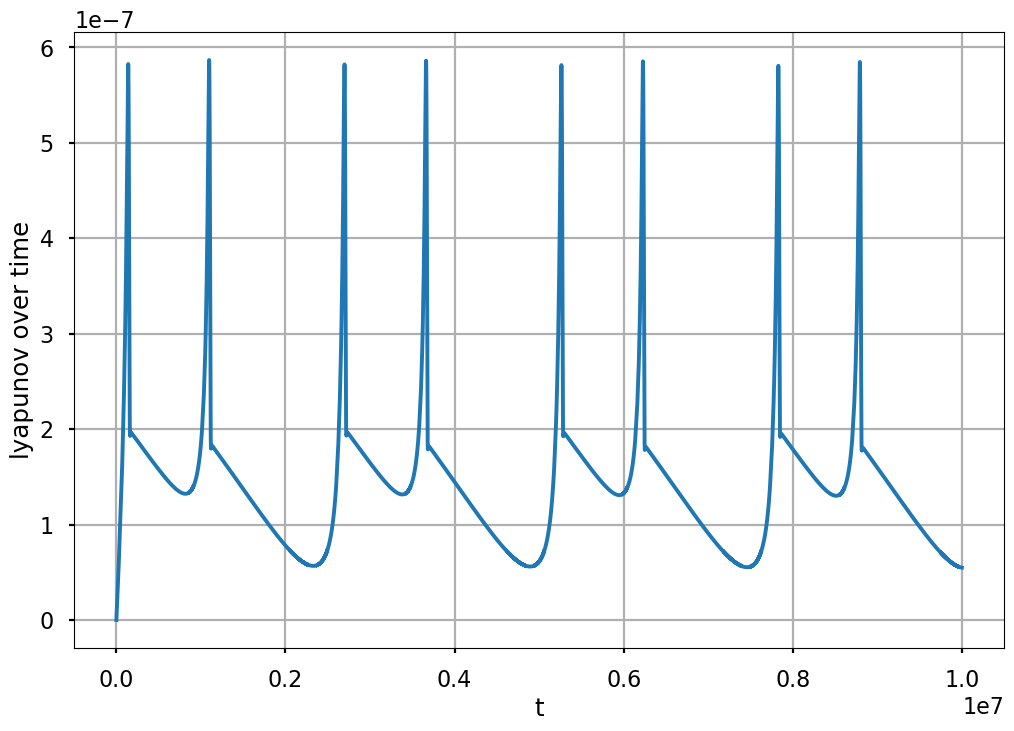

In [12]:
### CALC LYA AND DRAW LYA OVER TIME ###

lya = np.zeros(len(t)) #empty vector


#for i in range(1, len(t) - 1):
#    lya[i+1]=lya[i]+np.log(d[i+1]/pert[i])/i
    
#print(lya[len(t)-1])    


for i in range(1, len(t) - 1):
    lya[i+1]=lya[i]+np.log(pert[i]/pur)
    
print(lya[len(t)-1]/t[len(t)-1])    


plt.figure(figsize = (12, 8))

plt.xlabel('t')
plt.ylabel('lyapunov over time')
plt.plot(lya/[len(t)-1])

plt.grid()
plt.show()

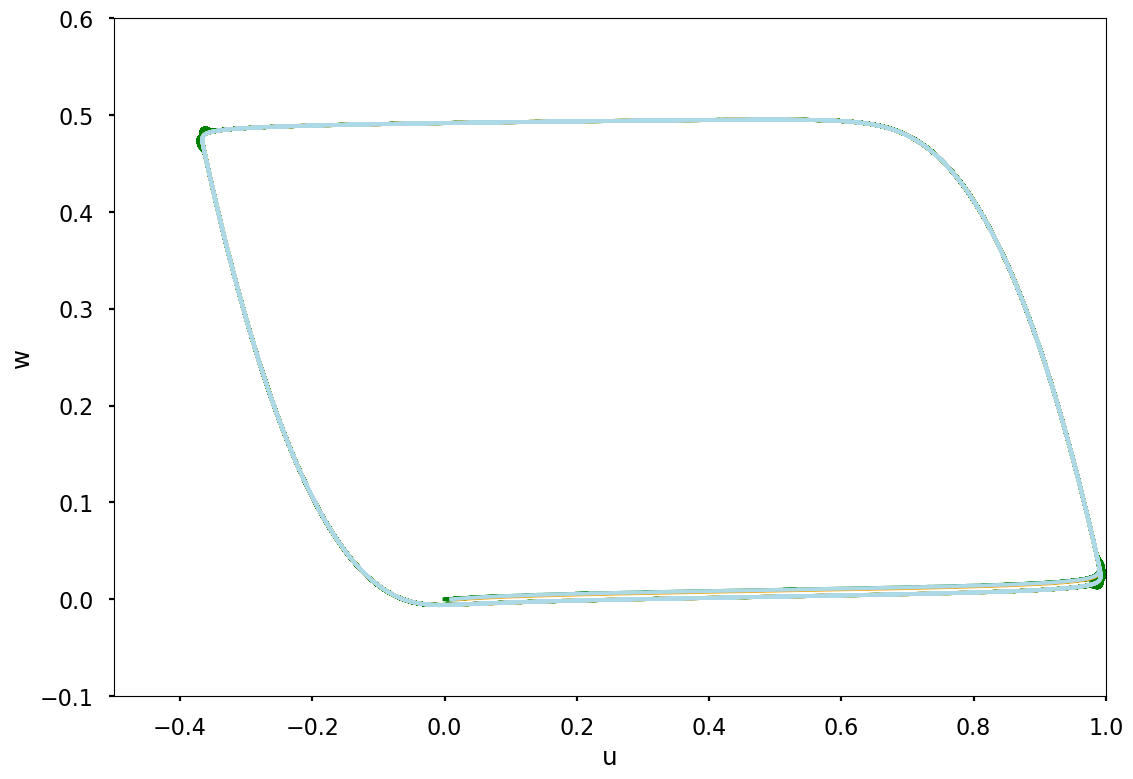

In [13]:
### ALL 3 TRAJECTORIES OVER TIME ###

plt.xlim(-0.5, 1)  #coordinate system
plt.ylim(-0.1, 0.6)
plt.xlabel('u')
plt.ylabel('w')

plt.plot(s_2[:,0], s_2[:,1],color='g')
plt.plot(s_1[:,0], s_1 [:,1],color='orange')
plt.plot(s[:,0], s[:,1],color='lightblue')